<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_OB/blob/main/mini_proj(1)/OBProject1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [ ]:
np.set_printoptions(suppress = True)

In [ ]:
plt.rc('font', family='NanumBarunGothic') # matplotlib 한글 깨짐 방지

# **1. 데이터 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
train = pd.read_csv('/gdrive/MyDrive/미니프로젝트(1)/data/train.csv')
test = pd.read_csv('/gdrive/MyDrive/미니프로젝트(1)/data/test.csv')

In [ ]:
train.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.472227,-1.756525,0.734336,9.126398,1,0,1,0,0,1,0,0
1,0.543313,-1.033082,-0.911192,9.052009,1,0,1,0,1,0,0,0
2,0.898745,-0.943687,-0.911192,10.207990,1,0,1,0,0,0,1,0
3,-0.025379,0.622393,3.202629,9.059265,1,0,1,0,0,0,1,0
4,1.040918,-1.504893,1.557100,9.431590,1,0,1,0,0,1,0,0


In [ ]:
test.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.401140,-0.891539,0.734336,9095.06825,1,0,1,0,1,0,0,0
1,-0.238638,-0.089461,-0.911192,5272.17580,1,0,1,0,0,1,0,0
2,1.751782,-0.608453,-0.911192,29330.98315,1,0,0,1,0,1,0,0
3,0.472227,-0.797177,1.557100,9301.89355,0,1,1,0,0,1,0,0
4,-1.447107,0.225079,-0.911192,33750.29180,0,1,0,1,0,1,0,0


# **2. Feature, Target 분리**


In [ ]:
X_train = train.drop(['charges'], axis = 1)
y_train = train['charges']

X_test = test.drop(['charges'], axis = 1)
y_test = test['charges']

# **3. 회귀 모델링**

## **3-1. 평가 지표**

### **1. RMSE(Rooted Mean Square Error)**  
- 회귀 모델의 성능을 평가하는 지표 중 하나로, 예측된 값과 실제 값 사이의 오차를 측정
  - 오차를 제곱하여 평균을 구한 뒤 다시 제곱근을 취한 값으로 계산
- 수식  
  $RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2}$  
  - N: 총 데이터 포인트의 개수
  - y_i: 실제 값(observed)
  - y_hat: 예측된 값(fitted)
- 예측 오차가 클수록 더 큰 패널티를 받음
  - RMSE가 작을수록 모델의 예측이 더 정확하다고 판단할 수 있음



**2) R-Sqaure(결정계수)**    
- 모형의 <U>설명력</U>을 의미
- 회귀식을 통해 얻어진 예측값(fitted)이 실제 y값(observed)을 얼마나 잘 설명하는지를 의미  
  => 종속 변수의 총 변동 중에서 독립 변수로 설명되는 변동의 비율  
- 수식  
  $R^2 = 1 - \frac{SSE}{SST}$

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## **3-2. 모델별 성능 확인을 위한 함수**

In [ ]:
colors = [
    'khaki', 'teal', 'orchid', 'sandybrown', 'greenyellow', 'dodgerblue', 'rosybrown',
    'deeppink', 'salmon', 'olivedrab', 'olive', 'forestgreen',
    'royalblue', 'mediumpurple', 'gold', 'seagreen',
    'turquoise', 'steelblue', 'slategray', 'peru', 'slateblue', 'cadetblue',
    'lime', 'lavender', 'lightcoral', 'lightseagreen', 'lightskyblue', 'lightgreen',
    'lightpink', 'lightsalmon', 'lightsteelblue', 'lightyellow', 'palegreen',
]

In [ ]:
## 회귀곡선 시각화
# 예측값, 실제값을 산점도로 표현

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(10, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='b')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

In [ ]:
# 평가 지표 시각화

def model_eval(name_, pred, actual):
    global my_predictions
    global colors

    plot_predictions(name_, pred, actual)

    rmse = np.sqrt(mean_squared_error(pred, actual))

    r2 = r2_score(actual, pred)

    my_predictions[name_] = {'rmse': rmse, 'R_2': r2}

    # 데이터 프레임 생성
    df = pd.DataFrame(my_predictions).T
    df['model'] = df.index
    df = df.sort_values(by = ['rmse', 'R_2'], ascending = [True, False])

    # 상한, 하한 설정
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10

    length = len(df)

    plt.figure(figsize = (10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['rmse'])

    for i, v in enumerate(df['rmse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('RMSE Error', fontsize = 18)
    plt.xlim(min_, max_)

    plt.show()

    print()
    print(df.iloc[:,:-1])

In [ ]:
# 모델의 중요 피처명과 그때의 중요도 값을 Series로 반환

def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
    return ftr_importances

def visualize_ftr_importances(model):
    fig, ax = plt.subplots(figsize=(7, 5))
    fig.tight_layout()

    ftr_importances = get_top_features(model)
    ax.set_title(model.__class__.__name__ + ' Feature Importances', size=15)

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)

    sns.barplot(x=ftr_importances.values, y=ftr_importances.index, ax=ax)

# **4. 모델링**
- 기존 모델링 결과 최적 모델을 기반으로 성능 비교
- 성능 비교 이후 하이퍼 파라미터 튜닝을 위한 성능 개선을 시도

## **4-1. 선형 회귀**

### **4-1-1. 단순 선형 회귀**

In [ ]:
my_predictions = {}  # 결과를 저장할 딕셔너리

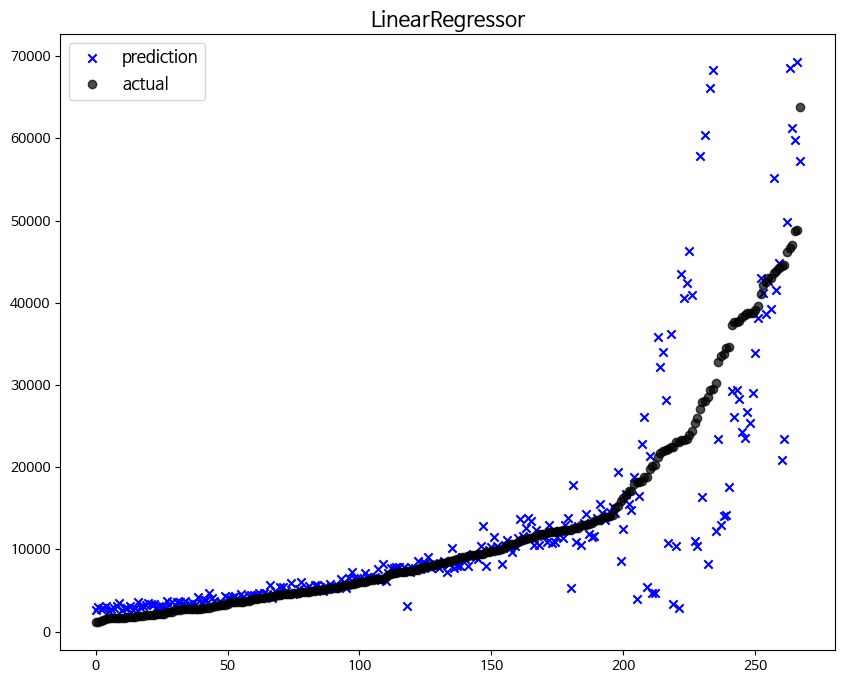

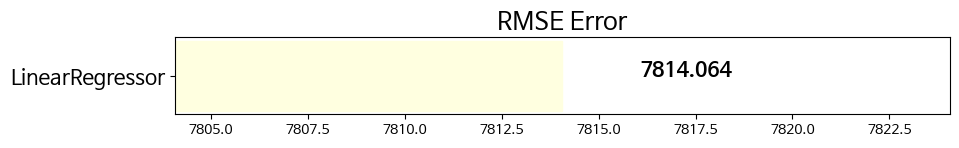


                      R_2         rmse
LinearRegressor  0.606698  7814.064026


In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression 모델을 생성하고 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


# 테스트 데이터로 예측을 수행
lr_pred = lr_model.predict(X_test)
lr_pred = np.expm1(lr_pred)

# 평가
model_eval('LinearRegressor', lr_pred, y_test)

### **4-1-2. 규제(Regularization)**
- 학습이 과대적합되는 것을 방지하고자 일종의 penalty를 부여하는 것



**1. L1 규제**
- 가중치의 합을 더한 값에 규제 강도를 곱하여 오차에 더한 값
- 어떤 가중치는 실제로 0이 됨 -> 모델에서 완전히 제외되는 특성이 발생할 수 있음
- <U>라쏘(Lasso)</U> 모델에 적용됨

**2. L2 규제**
- 각 가중치 제곱의 합에 규제 강도를 곱한 값
- 규제 강도를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), 규제 강도를 작게 하면 가중치가 증가함(규제를 중요시하지 않음)
- <U>릿지(Ridge)</U> 모델에 적용됨

**3. 엘라스틱넷**
- L1 규제 + L2 규제
- ```l1_ratio(default: 0.5)``` -> 규제 강도 조정
  - l1_ratio = 0: L2 규제만
  - l1_ratio =1: L1 규제만
  - 0 < l1_ratio < 1: L1 and L2 규제(혼합 사용)

#### **a) 라쏘(Lasso)**

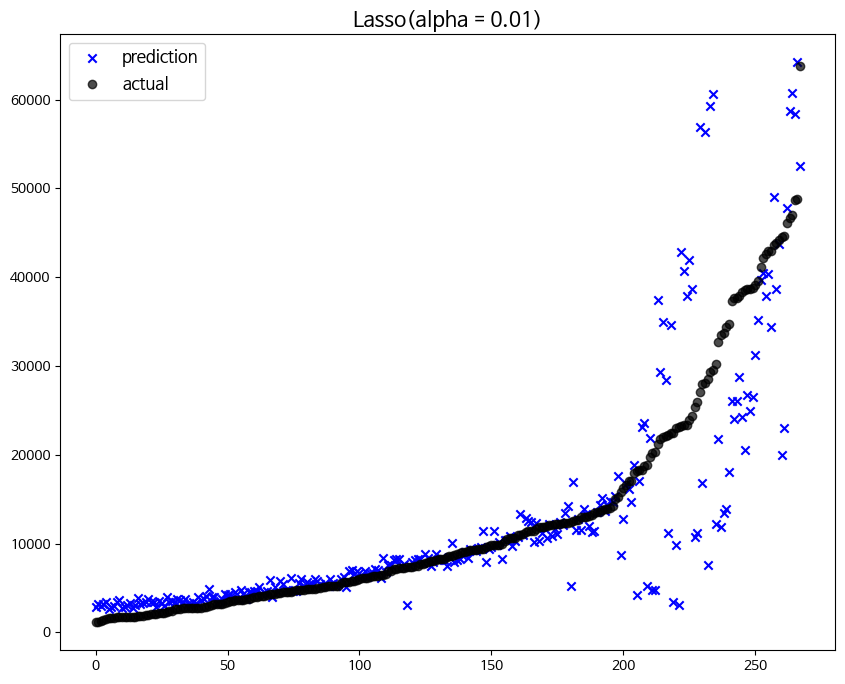

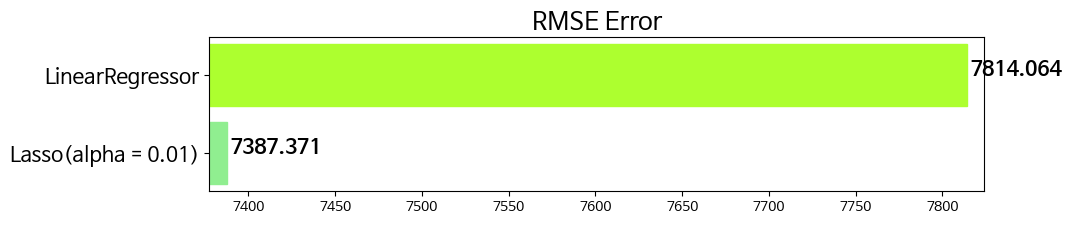


                            rmse       R_2
Lasso(alpha = 0.01)  7387.371426  0.648479
LinearRegressor      7814.064026  0.606698


In [ ]:
from sklearn.linear_model import Lasso

# Lasso 모델을 생성하고 학습
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X_train,y_train)

# 테스트 데이터로 예측을 수행
lasso_pred = lasso_model.predict(X_test)
lasso_pred = np.expm1(lasso_pred)

# 평가
model_eval('Lasso(alpha = 0.01)', lasso_pred, y_test)

#### **b) 릿지(Ridge)**

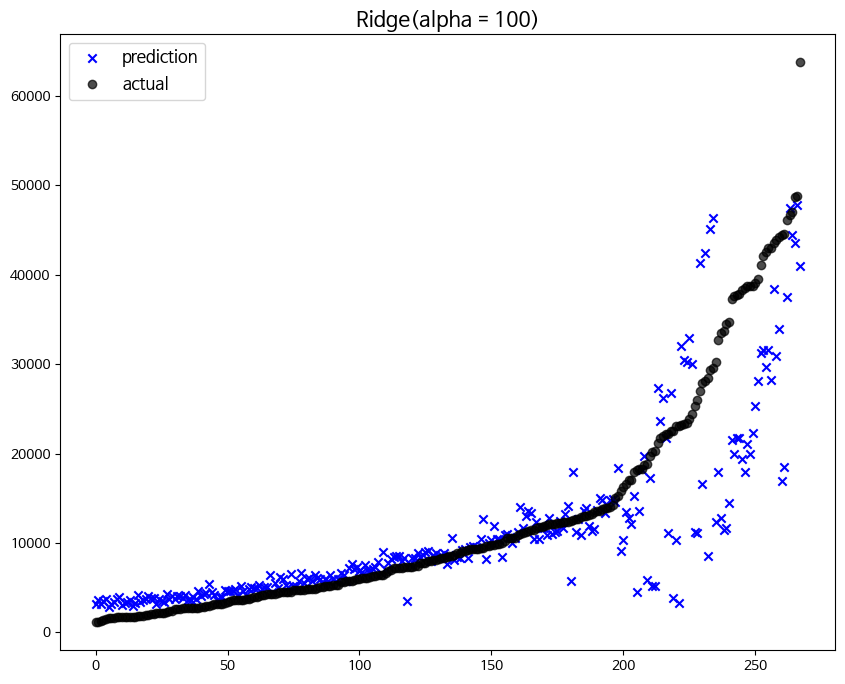

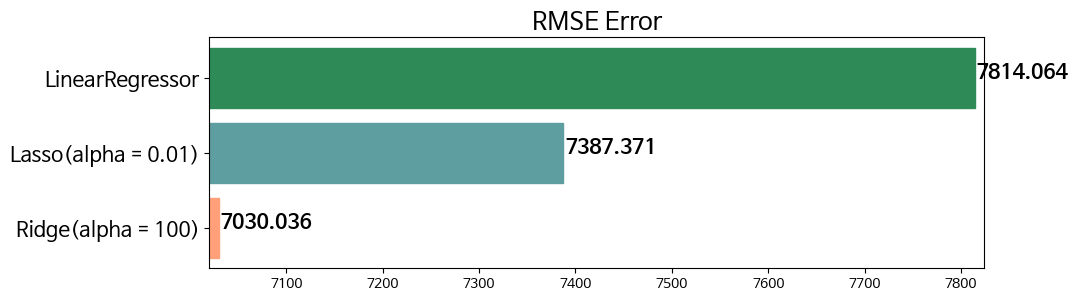


                            rmse       R_2
Ridge(alpha = 100)   7030.035998  0.681663
Lasso(alpha = 0.01)  7387.371426  0.648479
LinearRegressor      7814.064026  0.606698


In [ ]:
from sklearn.linear_model import Ridge

# Ridge 모델을 생성하고 학습
ridge_model = Ridge(alpha = 100)
ridge_model.fit(X_train,y_train)

# 테스트 데이터로 예측을 수행
ridge_pred = ridge_model.predict(X_test)
ridge_pred = np.expm1(ridge_pred)

# 평가
model_eval('Ridge(alpha = 100)', ridge_pred, y_test)

#### **c) 엘라스틱넷**

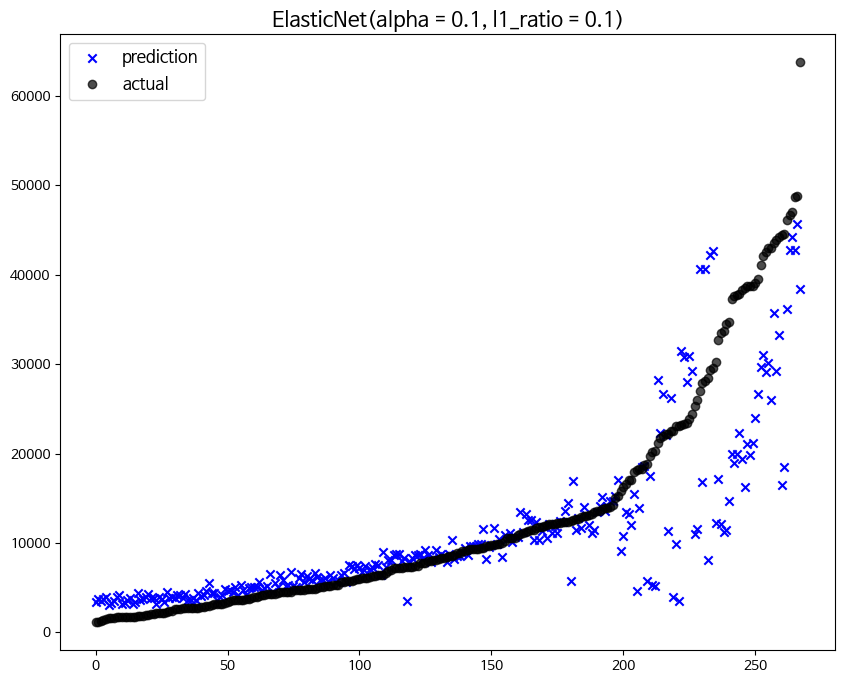

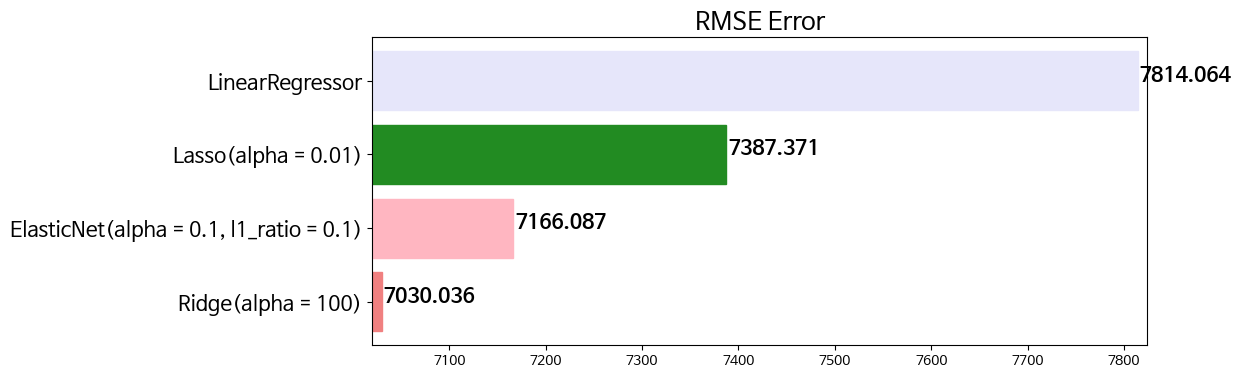


                                                rmse       R_2
Ridge(alpha = 100)                       7030.035998  0.681663
ElasticNet(alpha = 0.1, l1_ratio = 0.1)  7166.087458  0.669222
Lasso(alpha = 0.01)                      7387.371426  0.648479
LinearRegressor                          7814.064026  0.606698


In [ ]:
from sklearn.linear_model import ElasticNet

# ElasticNet 모델을 생성하고 학습
ela_model = ElasticNet(alpha = 0.1, l1_ratio = 0.1)
ela_model.fit(X_train,y_train)

# 테스트 데이터로 예측을 수행
ela_pred = ela_model.predict(X_test)
ela_pred = np.expm1(ela_pred)

# 평가
model_eval('ElasticNet(alpha = 0.1, l1_ratio = 0.1)', ela_pred, y_test)

## **4-2. 회귀 트리**

### **4-2-1. XGBoost**

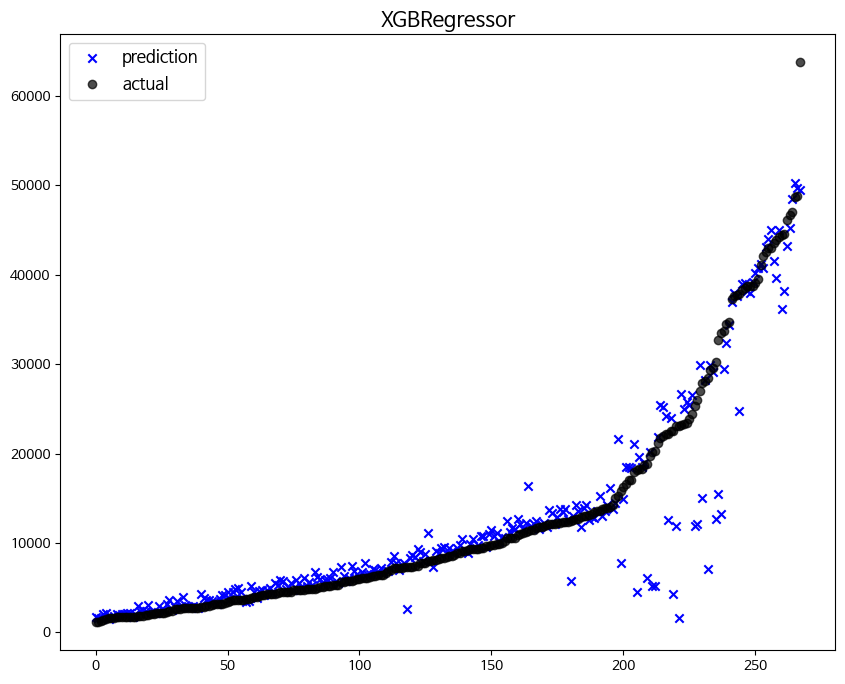

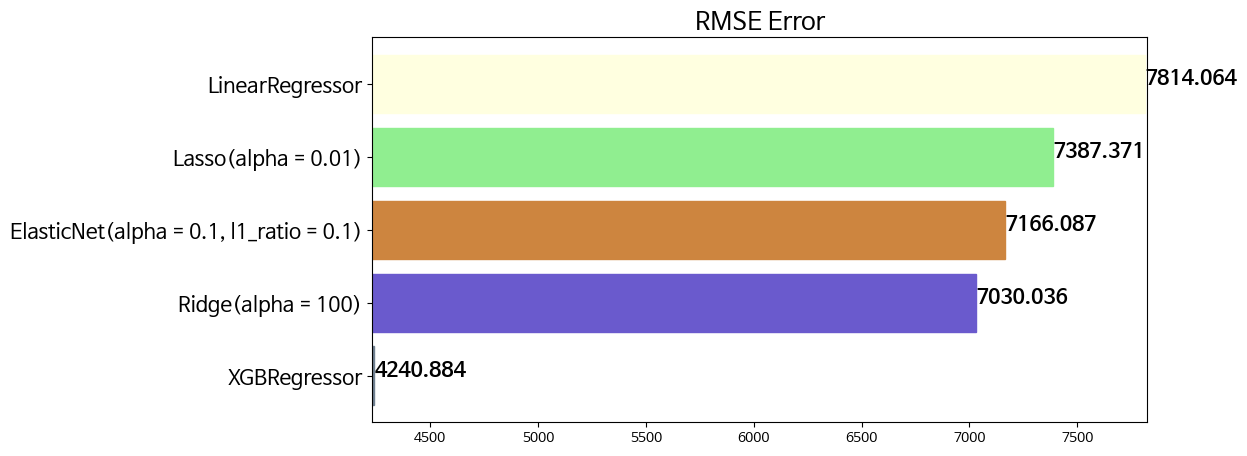


                                                rmse       R_2
XGBRegressor                             4240.883656  0.884153
Ridge(alpha = 100)                       7030.035998  0.681663
ElasticNet(alpha = 0.1, l1_ratio = 0.1)  7166.087458  0.669222
Lasso(alpha = 0.01)                      7387.371426  0.648479
LinearRegressor                          7814.064026  0.606698


In [ ]:
from xgboost import XGBRegressor

# XGBoost 모델을 생성하고 학습
xgb_model = XGBRegressor(colsample_bytree = 0.8, learning_rate = 0.1,
                         max_depth = 3, min_child_weight = 5,
                         n_estimators = 100)
xgb_model.fit(X_train,y_train)

# 테스트 데이터로 예측을 수행
xgb_pred = xgb_model.predict(X_test)
xgb_pred = np.expm1(xgb_pred)

# 평가
model_eval('XGBRegressor', xgb_pred, y_test)

### **4-2-2. GBM**

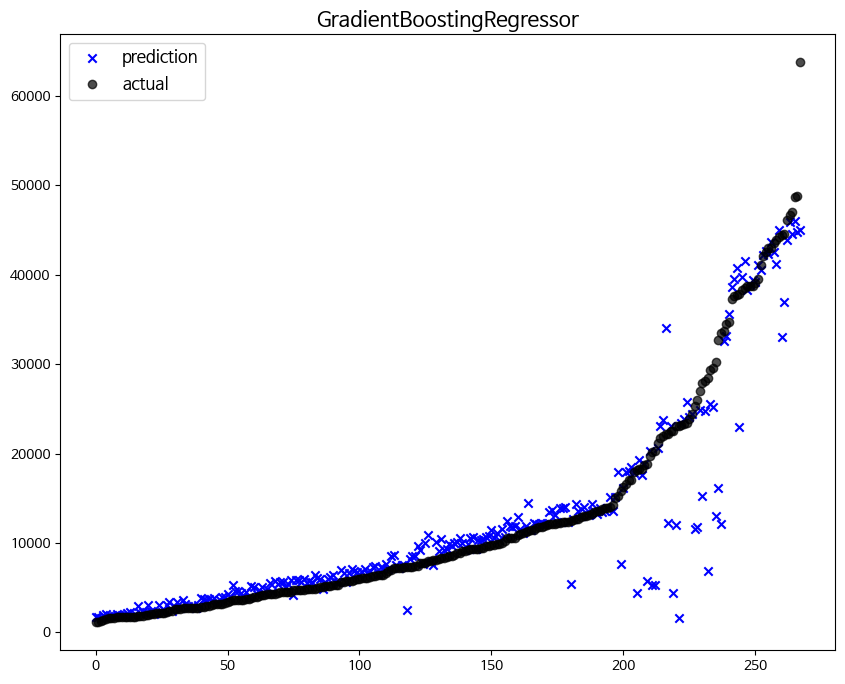

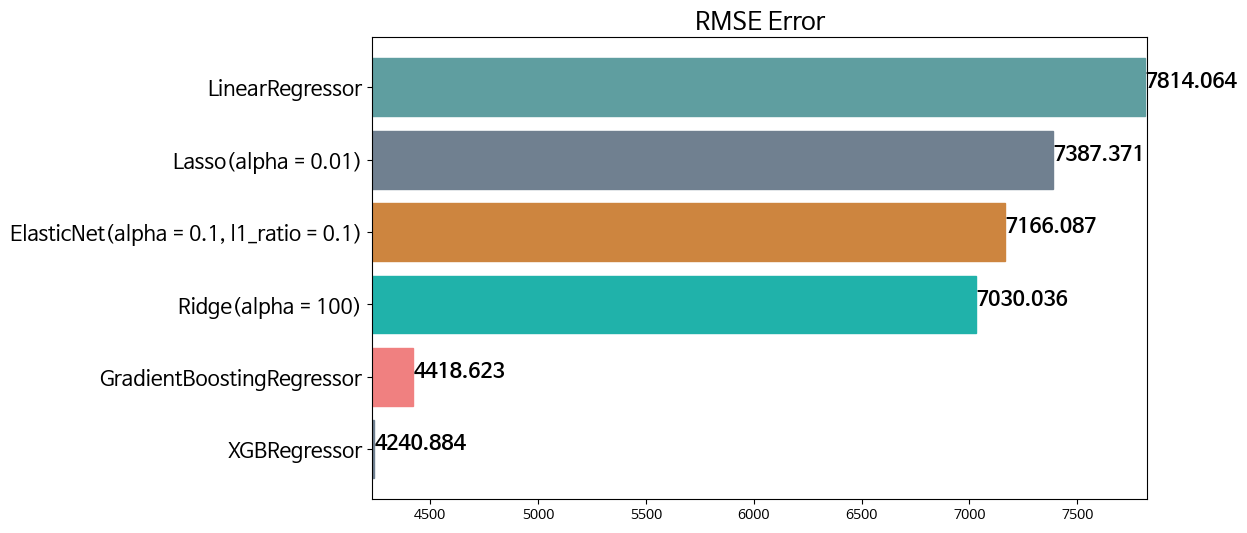


                                                rmse       R_2
XGBRegressor                             4240.883656  0.884153
GradientBoostingRegressor                4418.622935  0.874239
Ridge(alpha = 100)                       7030.035998  0.681663
ElasticNet(alpha = 0.1, l1_ratio = 0.1)  7166.087458  0.669222
Lasso(alpha = 0.01)                      7387.371426  0.648479
LinearRegressor                          7814.064026  0.606698


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# GBM 모델을 생성하고 학습
gbm_model = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 3,
                                      min_samples_leaf = 2, min_samples_split = 10,
                                      n_estimators = 100, subsample = 0.8)
gbm_model.fit(X_train,y_train)

# 테스트 데이터로 예측을 수행
gbm_pred = gbm_model.predict(X_test)
gbm_pred = np.expm1(gbm_pred)

# 평가
model_eval('GradientBoostingRegressor', gbm_pred, y_test)

### **4-2-3. LightGBM**

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score 9.113489


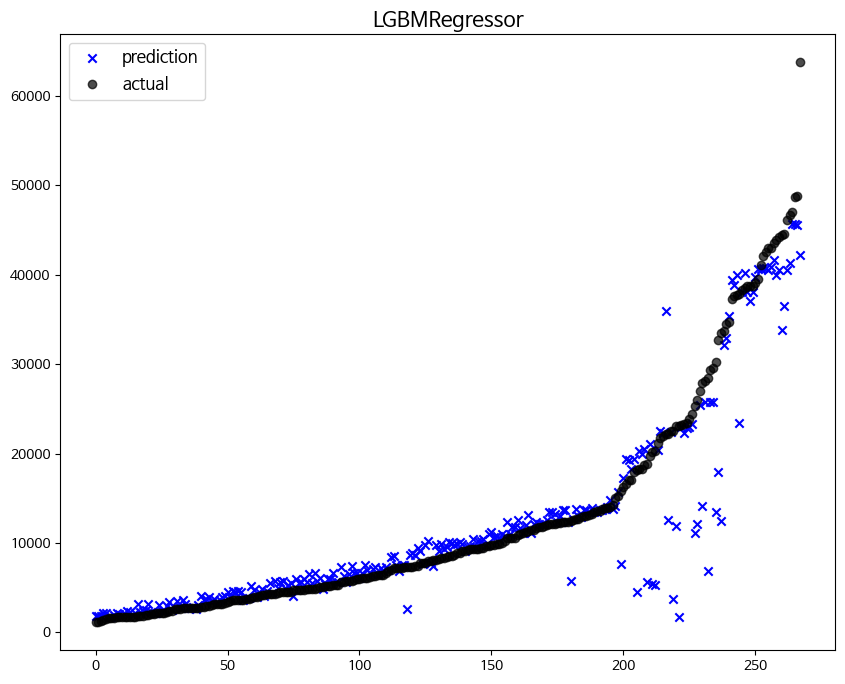

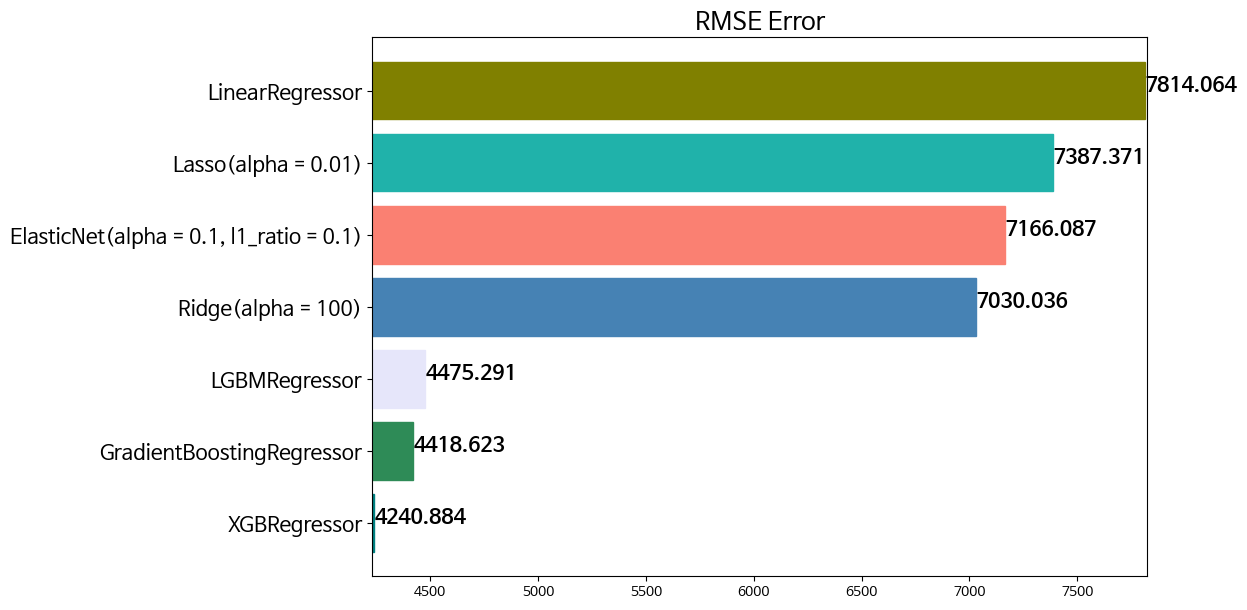


                                                rmse       R_2
XGBRegressor                             4240.883656  0.884153
GradientBoostingRegressor                4418.622935  0.874239
LGBMRegressor                            4475.290528  0.870993
Ridge(alpha = 100)                       7030.035998  0.681663
ElasticNet(alpha = 0.1, l1_ratio = 0.1)  7166.087458  0.669222
Lasso(alpha = 0.01)                      7387.371426  0.648479
LinearRegressor                          7814.064026  0.606698


In [ ]:
from lightgbm import LGBMRegressor

# LGBM 모델을 생성하고 학습
lgbm_model = LGBMRegressor(n_estimators = 50, learning_rate = 0.1,
                           num_leaves = 6, subsample = 0.2,
                           colsample_bytree = 0.8, reg_lambda = 2, n_jobs = -1)
lgbm_model.fit(X_train, y_train)

# 테스트 데이터로 예측을 수행
lgbm_pred = lgbm_model.predict(X_test)
lgbm_pred = np.expm1(lgbm_pred)

# 평가
model_eval('LGBMRegressor', lgbm_pred, y_test)

- ```XGBRegressor```의 성능이 가장 좋은 것으로 평가됨

# **5. 성능 최적화**
- GridSearchCV는 <U>미리 정의된</U> 그리드에서 하이퍼 파라미터 값을 조사
  - 튜닝해야 할 하이퍼 파라미터 개수가 많을 경우 최적화 수행 시간이 오래 걸린다는 단점이 존재



## **5-0. HyperOpt**
- 베이지안 최적화 알고리즘을 활용하여 효율적인 하이퍼파라미터 최적화를 제공하는 파이썬 라이브러리
  - 이를 통해 사용자는 자동화된 최적화, 다양한 최적화 알고리즘 선택, 고급 최적화 알고리즘 활용 등을 통해 모델 성능을 향상시킬 수 있음
- **주요 로직**
  1. 입력 변수명과 입력값의 검색 공간 설정
  2. 목적 함수 설정
  3. 목적 함수의 반환 최솟값을 가지는 최적 입력값 유추


### **5-1. 파라미터 튜닝**

- cf) Colab에는 이미 HyperOpt가 설치되어 있음

In [ ]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import STATUS_OK

In [ ]:
## 검색 공간 설정

space = {
    'n_estimators': hp.choice('n_estimators', list(range(100, 501))),
    'max_depth': hp.choice('max_depth', list(range(1, 21))),
    'learning_rate': hp.uniform('learning_rate', 0.01, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0, 1),
}

In [ ]:
## 목적 함수 설정

def objective(params):
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)

    return {'loss': rmse, 'status': STATUS_OK, 'r2': r_squared}

In [ ]:
## 파라미터 최적화 수행

from hyperopt import STATUS_OK

trials = Trials()
best = fmin(fn = objective, # 목적 함수
            space = space, # 탐색 공간
            algo = tpe.suggest, # 최적화 적용 알고리즘
            max_evals = 30,  # 최대 반복 횟수
            trials = trials, # 최적값 반환
            rstate = np.random.default_rng(seed = 0)) # seed 설정

print(best)

100%|██████████| 30/30 [00:11<00:00,  2.64trial/s, best loss: 17977.00102377324]
{'colsample_bytree': 0.9734711425057485, 'learning_rate': 0.05937252213915478, 'max_depth': 6, 'n_estimators': 305}


### **5-2. 최종 예측**

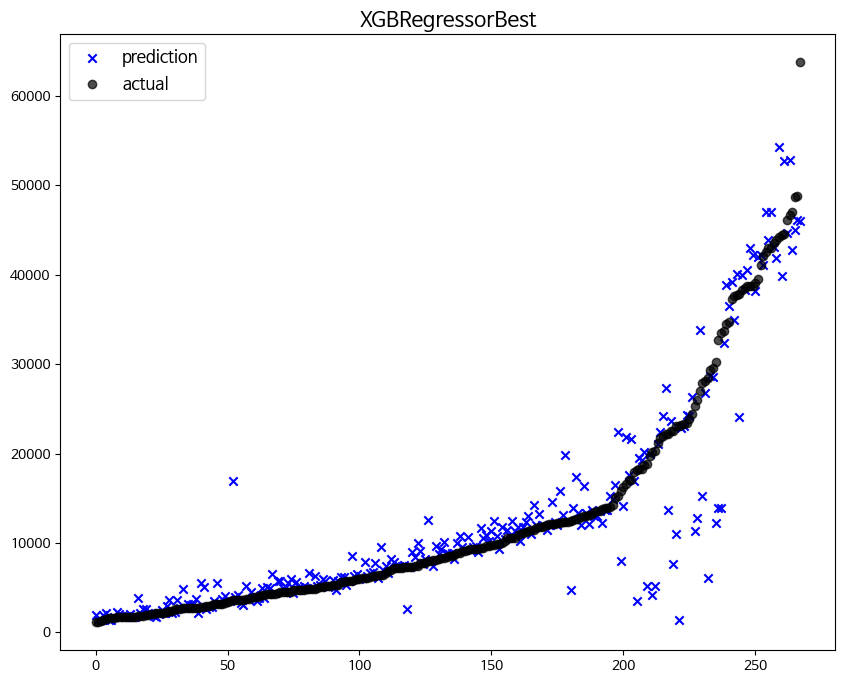

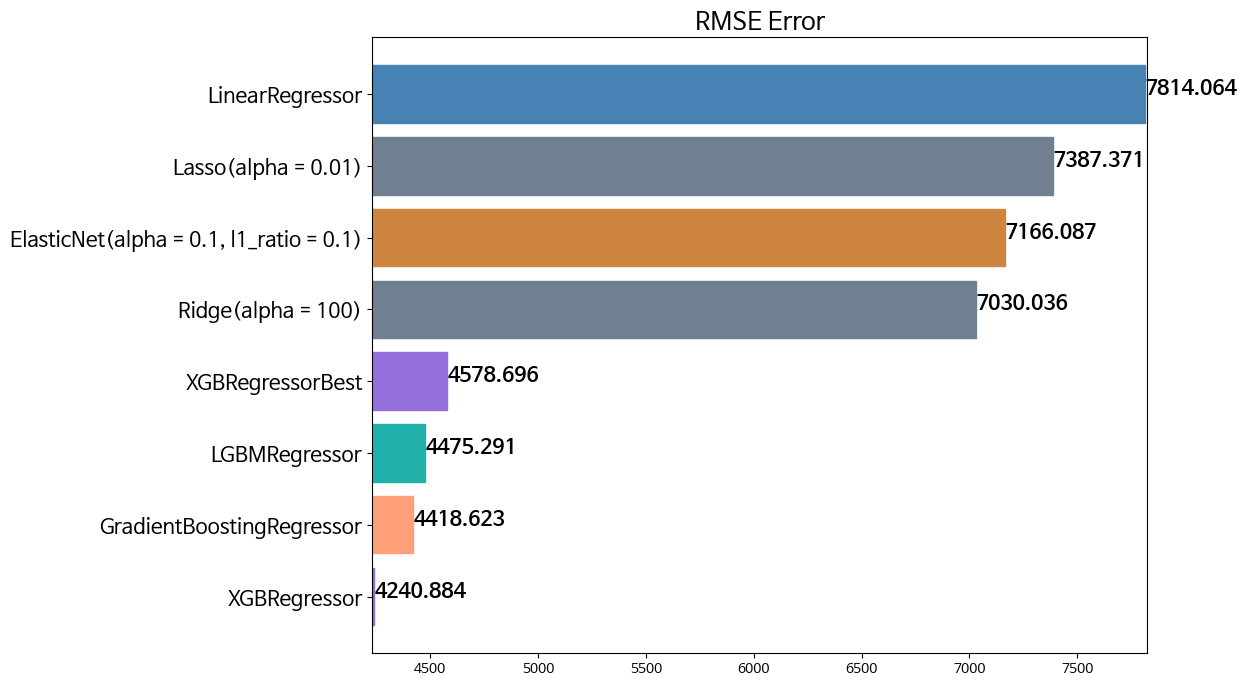


                                                rmse       R_2
XGBRegressor                             4240.883656  0.884153
GradientBoostingRegressor                4418.622935  0.874239
LGBMRegressor                            4475.290528  0.870993
XGBRegressorBest                         4578.696314  0.864962
Ridge(alpha = 100)                       7030.035998  0.681663
ElasticNet(alpha = 0.1, l1_ratio = 0.1)  7166.087458  0.669222
Lasso(alpha = 0.01)                      7387.371426  0.648479
LinearRegressor                          7814.064026  0.606698


In [ ]:
from xgboost import XGBRegressor

# XGBoost 최적 모델을 생성하고 학습
best_model = XGBRegressor(colsample_bytree = 0.9734711425057485, learning_rate = 0.05937252213915478,
                          max_depth = 6, n_estimators = 305)
best_model.fit(X_train,y_train)

# 테스트 데이터로 예측을 수행
best_pred = best_model.predict(X_test)
best_pred = np.expm1(best_pred)

# 평가
model_eval('XGBRegressorBest', best_pred, y_test)

- 성능이 오히려 안좋아졌다..?!